In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#Questão 1

In [3]:
df = pd.read_csv('data/vertebralcolumn-2C.csv')
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [4]:
x = df.drop('class', axis=1)
y = df['class']
x,y

(     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
 0           63.027817    22.552586              39.609117     40.475232   
 1           39.056951    10.060991              25.015378     28.995960   
 2           68.832021    22.218482              50.092194     46.613539   
 3           69.297008    24.652878              44.311238     44.644130   
 4           49.712859     9.652075              28.317406     40.060784   
 ..                ...          ...                    ...           ...   
 305         47.903565    13.616688              36.000000     34.286877   
 306         53.936748    20.721496              29.220534     33.215251   
 307         61.446597    22.694968              46.170347     38.751628   
 308         45.252792     8.693157              41.583126     36.559635   
 309         33.841641     5.073991              36.641233     28.767649   
 
      pelvic_radius  degree_spondylolisthesis  
 0        98.672917                 -0

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train, x_test, y_train, y_test

(     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
 299         82.905351    29.894119              58.250542     53.011232   
 288         74.565015    15.724320              58.618582     58.840695   
 72          84.974132    33.021175              60.859873     51.952957   
 15          44.318907    12.537992              36.098763     31.780915   
 10          49.706610    13.040974              31.334500     36.665635   
 ..                ...          ...                    ...           ...   
 188         85.680950    38.650035              82.680977     47.030914   
 71          86.900794    32.928168              47.794347     53.972627   
 106         65.013773     9.838262              57.735837     55.175511   
 270         51.311771     8.875541              57.000000     42.436230   
 102         70.399308    13.469986              61.200000     56.929322   
 
      pelvic_radius  degree_spondylolisthesis  
 299     110.708958                  6

In [6]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train,y_train)

y_pred = gnb.predict(x_test)

accNB = accuracy_score(y_test, y_pred)

accNB

0.7956989247311828

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

gbp = QuadraticDiscriminantAnalysis()

gbp.fit(x_train,y_train)

y_pred = gbp.predict(x_test)

accBP = accuracy_score(y_pred, y_test)

accBP

/home/pedro/.conda/envs/condaenv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/pedro/.conda/envs/condaenv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


0.8064516129032258

In [8]:
from sklearn.neighbors import KNeighborsClassifier

gbnp = KNeighborsClassifier()

gbnp.fit(x_train,y_train)

y_pred = gbnp.predict(x_test)

accBNP = accuracy_score(y_pred, y_test)

accBNP

0.7956989247311828

In [9]:
accs = {"Naive Bayes":accNB,"Bayesino paramétrico":accBP,"Bayesino não-paramétrico":accBNP}
best_classifier = max(accs, key=accs.get)

In [10]:
print(f"Resposta da questão 1: O melhor classificador foi {best_classifier}")

Resposta da questão 1: O melhor classificador foi Bayesino paramétrico


#Questão 2

In [11]:
df = pd.read_csv('data/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
dfx = df.drop('quality', axis=1)
dfy = df['quality']
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=42)
x_train, x_test, y_train, y_test

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 925             8.6             0.220         0.36             1.9      0.064   
 363            12.5             0.460         0.63             2.0      0.071   
 906             7.2             0.540         0.27             2.6      0.084   
 426             6.4             0.670         0.08             2.1      0.045   
 1251            7.5             0.580         0.14             2.2      0.077   
 ...             ...               ...          ...             ...        ...   
 1130            9.1             0.600         0.00             1.9      0.058   
 1294            8.2             0.635         0.10             2.1      0.073   
 860             7.2             0.620         0.06             2.7      0.077   
 1459            7.9             0.200         0.35             1.7      0.054   
 1126            5.8             0.290         0.26             1.7      0.063   
 
       free su

In [13]:
from sklearn.neighbors import KNeighborsClassifier

accs = {}
for i in range(1,101):

    gbnp = KNeighborsClassifier(n_neighbors=i)
    
    gbnp.fit(x_train,y_train)

    y_pred = gbnp.predict(x_test)

    accBNP = accuracy_score(y_pred, y_test)

    accs[i] = accBNP

best_hiperparameter = max(accs, key=accs.get)

In [14]:
print(f"Resposta da questão 2: O melhor hiperparâmetro foi {best_hiperparameter}")

Resposta da questão 2: O melhor hiperparâmetro foi 1


#Questão 3

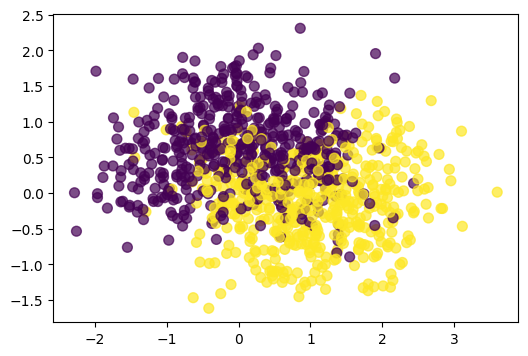

In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.5)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

In [16]:
h=int(input("Insira o valor do hiperparâmetro h: "))

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
accNB = accuracy_score(y_test, y_pred)

gbp = QuadraticDiscriminantAnalysis()
gbp.fit(x_train,y_train)
y_pred = gbp.predict(x_test)
accBP = accuracy_score(y_pred, y_test)

gbnp = KNeighborsClassifier(n_neighbors=h)
gbnp.fit(x_train,y_train)
y_pred = gbnp.predict(x_test)
accBNP = accuracy_score(y_pred, y_test)

accNB, accBP, accBNP

(0.8266666666666667, 0.8333333333333334, 0.8366666666666667)

In [18]:
accs = {"Naive Bayes":accNB,"Bayesino paramétrico":accBP,"Bayesino não-paramétrico":accBNP}
best_classifier = max(accs, key=accs.get)

In [19]:
print(f"Resposta da questão 3: O melhor método foi {best_classifier} (O classificador Bayesino não-paramétrico utilizou h={h}")

Resposta da questão 3: O melhor método foi Bayesino não-paramétrico (O classificador Bayesino não-paramétrico utilizou h=20
